<a href="https://colab.research.google.com/github/KOdunga/AIMLCourse/blob/main/ActivationFunctions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
print(tf.__version__)

2.15.0


**Dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
data = pd.read_csv('/content/auto-mpg.csv', na_values = '?', usecols=['Horsepower','MPG'])
data = data.dropna()
data.head()

,MPG,Horsepower
0,18.0,130.0
1,15.0,165.0
2,18.0,150.0
3,16.0,150.0
4,17.0,140.0


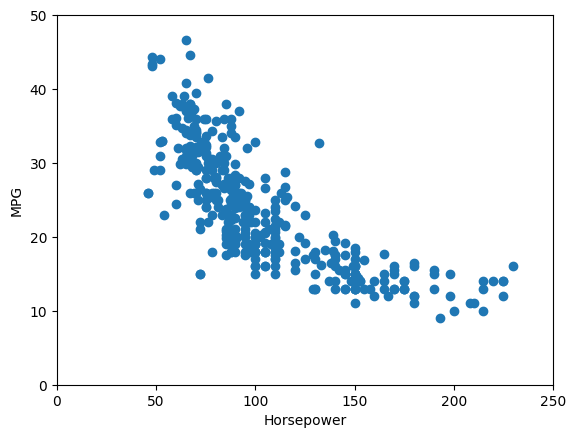

In [5]:
import matplotlib.pyplot as plt
plt.scatter(data['Horsepower'], data['MPG'], label = 'Data')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.xlim(0,250)
plt.ylim(0,50)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['Horsepower'], data['MPG'], test_size= 0.3, random_state= 42)

## Training
- With No activation functions

In [7]:
from tensorflow.keras.layers import Dense, Input, InputLayer
from tensorflow.keras import layers

model1 = tf.keras.Sequential()
model1.add(layers.BatchNormalization())
model1.add(InputLayer(input_shape = 1))
model1.add(Dense(64))
model1.add(Dense(64))
model1.add(Dense(1))

In [8]:
model1.compile(loss = 'mean_absolute_error', optimizer = tf.optimizers.Adam(learning_rate= 0.001))

In [9]:
model1.fit(X_train, y_train, validation_split= 0.2, verbose= 0, epochs= 100)

8/8 [==============================] - 0s 3ms/step


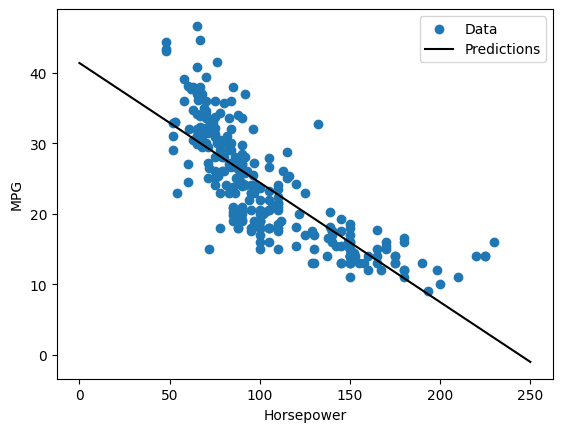

In [10]:
x = tf.linspace(0.0, 250, 251)
y = model1.predict(x)

plt.scatter(X_train, y_train, label='Data')
plt.plot(x, y, color='k', label='Predictions')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()

In [11]:
#Accuracy
from sklearn.metrics import mean_squared_error
tensor1 = tf.convert_to_tensor(X_test)
y_pred = model1.predict(tensor1).reshape(-1)
mean_squared_error(y_test, y_pred, squared = False)

4/4 [==============================] - 0s 4ms/step


4.973114570366265

**Using Activation Functions**

In [12]:
model2 = tf.keras.Sequential()
model2.add(layers.BatchNormalization())
model2.add(InputLayer(input_shape =1))
model2.add(Dense(64, activation ='relu'))
model2.add(Dense(64, activation ='relu'))
model2.add(Dense(1))

In [13]:
model2.compile(loss = 'mean_absolute_error', optimizer = tf.optimizers.Adam(learning_rate = 0.001))

In [14]:
model2.fit(X_train, y_train, validation_split = 0.2,verbose = 0, epochs = 100)

8/8 [==============================] - 0s 3ms/step


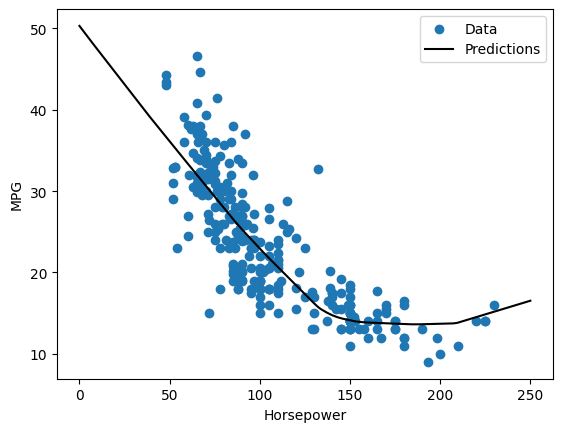

In [15]:
x = tf.linspace(0.0, 250, 251)
y = model2.predict(x)

plt.scatter(X_train, y_train, label='Data')
plt.plot(x, y, color='k', label='Predictions')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()

In [16]:
# Accuracy (Root Mean Squared Error)
tensor1 = tf.convert_to_tensor(X_test)
y_pred = model2.predict(tensor1).reshape(-1)
mean_squared_error(y_test, y_pred, squared=False)

4/4 [==============================] - 0s 6ms/step


4.453987113267483